# Classification of driving behavior using acc. data

This notebooks uses the driving behavior dataset from Kaggle and aims to classify the driver's driving based on accelerometer data.

## Libraries

In [2]:
from matplotlib import pyplot as plt

import seaborn as sns
import pandas as pd
import numpy as np

## Preprocessing

In [3]:
# loading data
df = pd.read_csv('datasets/train_motion_data.csv')

df.head()

,AccX,AccY,AccZ,GyroX,GyroY,GyroZ,Class,Timestamp
0,0.000000,0.000000,0.000000,0.059407,-0.174707,0.101938,NORMAL,3581629
1,-1.624864,-1.082492,-0.204183,-0.028558,0.051313,0.135536,NORMAL,3581630
2,-0.594660,-0.122410,0.220502,-0.019395,-0.029322,0.087888,NORMAL,3581630
3,0.738478,-0.228456,0.667732,0.069791,-0.029932,0.054902,NORMAL,3581631
4,0.101741,0.777568,-0.066730,0.030696,-0.003665,0.054902,NORMAL,3581631


In [4]:
# showing info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3644 entries, 0 to 3643
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AccX       3644 non-null   float64
 1   AccY       3644 non-null   float64
 2   AccZ       3644 non-null   float64
 3   GyroX      3644 non-null   float64
 4   GyroY      3644 non-null   float64
 5   GyroZ      3644 non-null   float64
 6   Class      3644 non-null   object 
 7   Timestamp  3644 non-null   int64  
dtypes: float64(6), int64(1), object(1)
memory usage: 227.9+ KB


In [5]:
# basic statistics
df.describe()

,AccX,AccY,AccZ,GyroX,GyroY,GyroZ,Timestamp
count,3644.000000,3644.000000,3644.000000,3644.000000,3644.000000,3644.000000,3.644000e+03
mean,0.040467,-0.073418,0.008271,0.001593,-0.001273,0.007949,3.582707e+06
std,0.985653,0.903408,0.985061,0.066918,0.126205,0.115687,6.421479e+02
min,-4.636523,-4.699795,-7.143998,-0.751822,-1.587028,-1.236468,3.581629e+06
25%,-0.550695,-0.592540,-0.558464,-0.028558,-0.053756,-0.029398,3.582121e+06
50%,0.003931,-0.080833,0.002262,0.001985,-0.001833,0.002978,3.582702e+06
75%,0.595987,0.452401,0.556157,0.031918,0.051313,0.040852,3.583270e+06
max,4.985548,4.245151,5.171739,0.849255,1.679879,1.190500,3.583791e+06


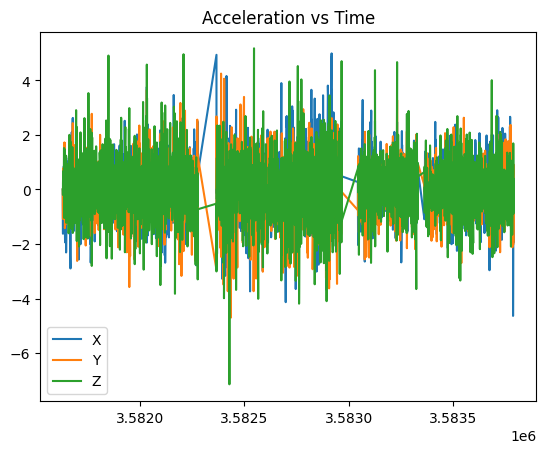

In [6]:
# Acceleration vs Time
plt.plot(df['Timestamp'], df['AccX'])
plt.plot(df['Timestamp'], df['AccY'])
plt.plot(df['Timestamp'], df['AccZ'])

plt.legend(['X', 'Y', 'Z'])
plt.title('Acceleration vs Time')
plt.show()

The dataset is clean with no null values. Becuase we are working with time-dependent physiscal measurements, we will not be removing the outliers as they carry important information regarding the driving at that moment in time.

From the plot, we can identify 4 distinct measurements and will analyse them separately.

We will divide the dataset into its 4 independent time frames

In [7]:
# verifying time stops
(df[['Timestamp']].diff() > 1).sum()

Timestamp    3
dtype: int64

Three time stops indicate 4 time slots

In [8]:
# get indeces for time windows
time_index = df[(df[['Timestamp']].diff() > 1)['Timestamp']].index
time_index

Index([1200, 2313, 2849], dtype='int64')

In [9]:
# create new dfs
df_1 = df.iloc[0:time_index[0], :]
df_1.tail()

,AccX,AccY,AccZ,GyroX,GyroY,GyroZ,Class,Timestamp
1195,-0.820672,2.556599,-0.617599,-0.031612,-0.865596,-0.962189,NORMAL,3582274
1196,-0.016871,1.171574,0.603792,0.253662,0.692110,0.537485,NORMAL,3582275
1197,2.488864,-1.001262,0.432143,0.140041,-0.080023,0.051847,NORMAL,3582275
1198,-0.680338,-0.048300,-3.298533,-0.169057,-0.383012,0.217392,NORMAL,3582276
1199,0.563353,1.234707,-0.729512,0.226784,-1.290758,-0.309174,NORMAL,3582276


In [10]:
# create new dfs
df_2 = df.iloc[time_index[0]:time_index[1], :]
df_2.tail()

,AccX,AccY,AccZ,GyroX,GyroY,GyroZ,Class,Timestamp
2308,0.538870,-1.645984,-0.712197,0.349568,0.028100,0.662712,AGGRESSIVE,3582964
2309,1.678918,-1.392127,-0.476326,0.570090,-0.061697,-0.168675,AGGRESSIVE,3582965
2310,0.323433,0.589311,-1.939797,-0.027947,1.255328,0.639500,AGGRESSIVE,3582965
2311,2.497311,-0.606175,4.700154,0.849255,-0.196699,-0.240757,AGGRESSIVE,3582966
2312,0.482297,-0.090277,-1.165673,-0.558178,-0.242514,-0.383700,AGGRESSIVE,3582966


In [11]:
# create new dfs
df_3 = df.iloc[time_index[1]:time_index[2], :]
df_3.head()

,AccX,AccY,AccZ,GyroX,GyroY,GyroZ,Class,Timestamp
2313,0.268914,-0.761465,0.762380,-0.041386,0.158825,-0.331776,SLOW,3583044
2314,-2.038684,1.218967,0.840069,0.028253,0.028100,0.115377,SLOW,3583045
2315,-0.034550,-0.109122,-0.105034,0.059407,0.006109,0.196622,SLOW,3583045
2316,-0.322625,-0.346236,0.274647,0.080176,-0.013439,0.335900,SLOW,3583046
2317,0.344335,-0.129027,0.524487,0.045968,-0.039706,0.348117,SLOW,3583046


In [12]:
# create new dfs
df_4 = df.iloc[time_index[2]:, :]
df_4.tail()

,AccX,AccY,AccZ,GyroX,GyroY,GyroZ,Class,Timestamp
3639,0.915688,-2.017489,1.687505,0.450360,0.384845,-1.236468,SLOW,3583789
3640,-1.934203,0.914925,-0.096013,0.321468,0.649350,-0.477162,SLOW,3583790
3641,-0.222845,0.747304,-0.887430,0.361174,-0.406836,0.054291,SLOW,3583790
3642,-0.349423,0.067261,0.394368,-0.132405,0.020159,-0.004963,SLOW,3583791
3643,-0.402428,0.406218,-0.423009,-0.053603,-0.006720,0.001145,SLOW,3583791


## Enriching dataset

We will calculate more physical parameters from the available data such as: acceleration norm, jerk, etc.

In [13]:
# acceleration norm
dfs = [df_1, df_2, df_3, df_4]

for dataframe in dfs:
    acc = np.sqrt((dataframe.loc[:,'AccX'].copy())**2 + (dataframe.loc[:,'AccY'].copy())**2 + (dataframe.loc[:,'AccZ'].copy())**2)
    dataframe.loc[:,'Acc'] = acc
    dataframe = dataframe.reindex(sorted(dataframe.columns), axis=1)
    display(dataframe.head())

C:\Users\ayrto\AppData\Local\Temp\ipykernel_5276\2442632679.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe.loc[:,'Acc'] = acc


,Acc,AccX,AccY,AccZ,Class,GyroX,GyroY,GyroZ,Timestamp
0,0.000000,0.000000,0.000000,0.000000,NORMAL,0.059407,-0.174707,0.101938,3581629
1,1.963075,-1.624864,-1.082492,-0.204183,NORMAL,-0.028558,0.051313,0.135536,3581630
2,0.645930,-0.594660,-0.122410,0.220502,NORMAL,-0.019395,-0.029322,0.087888,3581630
3,1.021474,0.738478,-0.228456,0.667732,NORMAL,0.069791,-0.029932,0.054902,3581631
4,0.787030,0.101741,0.777568,-0.066730,NORMAL,0.030696,-0.003665,0.054902,3581631


C:\Users\ayrto\AppData\Local\Temp\ipykernel_5276\2442632679.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe.loc[:,'Acc'] = acc


,Acc,AccX,AccY,AccZ,Class,GyroX,GyroY,GyroZ,Timestamp
1200,5.769525,4.933154,-2.946080,-0.521562,AGGRESSIVE,0.226784,-1.290758,-0.309174,3582366
1201,4.684262,2.397097,2.675064,-3.006705,AGGRESSIVE,0.014203,0.009163,0.054902,3582366
1202,0.199308,-0.147440,0.042525,0.127188,AGGRESSIVE,0.017257,-0.003054,0.075060,3582367
1203,0.638895,0.086913,0.360096,0.520542,AGGRESSIVE,0.066737,-0.007941,0.166079,3582367
1204,1.928528,-1.122270,1.058838,1.156976,AGGRESSIVE,0.088728,0.000000,0.381714,3582368


C:\Users\ayrto\AppData\Local\Temp\ipykernel_5276\2442632679.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe.loc[:,'Acc'] = acc


,Acc,AccX,AccY,AccZ,Class,GyroX,GyroY,GyroZ,Timestamp
2313,1.110570,0.268914,-0.761465,0.762380,SLOW,-0.041386,0.158825,-0.331776,3583044
2314,2.519490,-2.038684,1.218967,0.840069,SLOW,0.028253,0.028100,0.115377,3583045
2315,0.155349,-0.034550,-0.109122,-0.105034,SLOW,0.059407,0.006109,0.196622,3583045
2316,0.547172,-0.322625,-0.346236,0.274647,SLOW,0.080176,-0.013439,0.335900,3583046
2317,0.640547,0.344335,-0.129027,0.524487,SLOW,0.045968,-0.039706,0.348117,3583046


C:\Users\ayrto\AppData\Local\Temp\ipykernel_5276\2442632679.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe.loc[:,'Acc'] = acc


,Acc,AccX,AccY,AccZ,Class,GyroX,GyroY,GyroZ,Timestamp
2849,1.274451,-1.094320,0.140263,0.637978,SLOW,-0.062766,-0.034819,0.001756,3583363
2850,1.314181,-0.989751,0.602899,0.619659,SLOW,-0.049327,-0.091019,-0.042837,3583363
2851,1.134747,0.131062,0.757418,0.834740,SLOW,0.033139,0.136834,0.015806,3583364
2852,0.984334,0.484404,0.070784,-0.853965,SLOW,-0.025504,-0.052534,-0.028176,3583364
2853,0.795222,-0.100893,0.003070,-0.788790,SLOW,0.029474,0.014050,0.001756,3583365


In [14]:
# jerk
for dataframe in dfs:
    jerkx = np.gradient(dataframe.loc[:,'AccX'])
    jerky = np.gradient(dataframe.loc[:,'AccY'])
    jerkz = np.gradient(dataframe.loc[:,'AccZ'])
    dataframe.loc[:,'JerkX'] = jerkx
    dataframe.loc[:,'JerkY'] = jerky
    dataframe.loc[:,'JerkZ'] = jerkz
    dataframe.loc[:,'Jerk'] = np.sqrt(dataframe.loc[:,'JerkX']**2 + dataframe.loc[:,'JerkY']**2 + dataframe.loc[:,'JerkZ']**2)
    dataframe = dataframe.reindex(sorted(dataframe.columns), axis=1)
    display(dataframe.head())

C:\Users\ayrto\AppData\Local\Temp\ipykernel_5276\3412589110.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe.loc[:,'JerkX'] = jerkx
C:\Users\ayrto\AppData\Local\Temp\ipykernel_5276\3412589110.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe.loc[:,'JerkY'] = jerky
C:\Users\ayrto\AppData\Local\Temp\ipykernel_5276\3412589110.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the

,Acc,AccX,AccY,AccZ,Class,GyroX,GyroY,GyroZ,Jerk,JerkX,JerkY,JerkZ,Timestamp
0,0.000000,0.000000,0.000000,0.000000,NORMAL,0.059407,-0.174707,0.101938,1.963075,-1.624864,-1.082492,-0.204183,3581629
1,1.963075,-1.624864,-1.082492,-0.204183,NORMAL,-0.028558,0.051313,0.135536,0.322965,-0.297330,-0.061205,0.110251,3581630
2,0.645930,-0.594660,-0.122410,0.220502,NORMAL,-0.019395,-0.029322,0.087888,1.329944,1.181671,0.427018,0.435957,3581630
3,1.021474,0.738478,-0.228456,0.667732,NORMAL,0.069791,-0.029932,0.054902,0.586821,0.348200,0.449989,-0.143616,3581631
4,0.787030,0.101741,0.777568,-0.066730,NORMAL,0.030696,-0.003665,0.054902,0.437011,-0.290004,0.287173,-0.156229,3581631


C:\Users\ayrto\AppData\Local\Temp\ipykernel_5276\3412589110.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe.loc[:,'JerkX'] = jerkx
C:\Users\ayrto\AppData\Local\Temp\ipykernel_5276\3412589110.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe.loc[:,'JerkY'] = jerky
C:\Users\ayrto\AppData\Local\Temp\ipykernel_5276\3412589110.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the

,Acc,AccX,AccY,AccZ,Class,GyroX,GyroY,GyroZ,Jerk,JerkX,JerkY,JerkZ,Timestamp
1200,5.769525,4.933154,-2.946080,-0.521562,AGGRESSIVE,0.226784,-1.290758,-0.309174,6.648667,-2.536057,5.621143,-2.485143,3582366
1201,4.684262,2.397097,2.675064,-3.006705,AGGRESSIVE,0.014203,0.009163,0.054902,2.965007,-2.540297,1.494302,0.324375,3582366
1202,0.199308,-0.147440,0.042525,0.127188,AGGRESSIVE,0.017257,-0.003054,0.075060,2.405072,-1.155092,-1.157484,1.763623,3582367
1203,0.638895,0.086913,0.360096,0.520542,AGGRESSIVE,0.066737,-0.007941,0.166079,0.872303,-0.487415,0.508156,0.514894,3582367
1204,1.928528,-1.122270,1.058838,1.156976,AGGRESSIVE,0.088728,0.000000,0.381714,1.491197,-1.216453,0.742529,-0.438816,3582368


C:\Users\ayrto\AppData\Local\Temp\ipykernel_5276\3412589110.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe.loc[:,'JerkX'] = jerkx
C:\Users\ayrto\AppData\Local\Temp\ipykernel_5276\3412589110.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe.loc[:,'JerkY'] = jerky
C:\Users\ayrto\AppData\Local\Temp\ipykernel_5276\3412589110.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the

,Acc,AccX,AccY,AccZ,Class,GyroX,GyroY,GyroZ,Jerk,JerkX,JerkY,JerkZ,Timestamp
2313,1.110570,0.268914,-0.761465,0.762380,SLOW,-0.041386,0.158825,-0.331776,3.041900,-2.307598,1.980431,0.077689,3583044
2314,2.519490,-2.038684,1.218967,0.840069,SLOW,0.028253,0.028100,0.115377,0.563482,-0.151732,0.326172,-0.433707,3583045
2315,0.155349,-0.034550,-0.109122,-0.105034,SLOW,0.059407,0.006109,0.196622,1.195242,0.858029,-0.782601,-0.282711,3583045
2316,0.547172,-0.322625,-0.346236,0.274647,SLOW,0.080176,-0.013439,0.335900,0.367507,0.189442,-0.009953,0.314760,3583046
2317,0.640547,0.344335,-0.129027,0.524487,SLOW,0.045968,-0.039706,0.348117,0.378808,-0.187044,-0.304901,0.124682,3583046


C:\Users\ayrto\AppData\Local\Temp\ipykernel_5276\3412589110.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe.loc[:,'JerkX'] = jerkx
C:\Users\ayrto\AppData\Local\Temp\ipykernel_5276\3412589110.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe.loc[:,'JerkY'] = jerky
C:\Users\ayrto\AppData\Local\Temp\ipykernel_5276\3412589110.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the

,Acc,AccX,AccY,AccZ,Class,GyroX,GyroY,GyroZ,Jerk,JerkX,JerkY,JerkZ,Timestamp
2849,1.274451,-1.094320,0.140263,0.637978,SLOW,-0.062766,-0.034819,0.001756,0.474661,0.104569,0.462636,-0.018318,3583363
2850,1.314181,-0.989751,0.602899,0.619659,SLOW,-0.049327,-0.091019,-0.042837,0.693029,0.612691,0.308578,0.098381,3583363
2851,1.134747,0.131062,0.757418,0.834740,SLOW,0.033139,0.136834,0.015806,1.075621,0.737077,-0.266057,-0.736812,3583364
2852,0.984334,0.484404,0.070784,-0.853965,SLOW,-0.025504,-0.052534,-0.028176,0.902593,-0.115977,-0.377174,-0.811765,3583364
2853,0.795222,-0.100893,0.003070,-0.788790,SLOW,0.029474,0.014050,0.001756,0.508711,-0.167275,-0.118701,0.465528,3583365


In [19]:
# angular acceleration
for dataframe in dfs:
    ang_accx = np.gradient(dataframe.loc[:,'GyroX'].copy())
    ang_accy = np.gradient(dataframe.loc[:,'GyroY'].copy())
    ang_accz = np.gradient(dataframe.loc[:,'GyroZ'].copy())
    ang_acc = np.sqrt((ang_accx)**2 + (ang_accy)**2 + (ang_accz)**2)
    dataframe.loc[:,'AngaccX'] = ang_accx
    dataframe.loc[:,'AngaccY'] = ang_accy
    dataframe.loc[:,'AngaccZ'] = ang_accz
    dataframe.loc[:,'Angacc'] = ang_acc
    dataframe = dataframe.reindex(sorted(dataframe.columns), axis=1)
    display(dataframe.head())

C:\Users\ayrto\AppData\Local\Temp\ipykernel_5276\1220984397.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe.loc[:,'AngaccX'] = ang_accx
C:\Users\ayrto\AppData\Local\Temp\ipykernel_5276\1220984397.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe.loc[:,'AngaccY'] = ang_accy
C:\Users\ayrto\AppData\Local\Temp\ipykernel_5276\1220984397.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instea

,Acc,AccX,AccY,AccZ,Angacc,AngaccX,AngaccY,AngaccZ,Class,GyroX,GyroY,GyroZ,Jerk,JerkX,JerkY,JerkZ,Timestamp
0,0.000000,0.000000,0.000000,0.000000,0.244850,-0.087965,0.226020,0.033598,NORMAL,0.059407,-0.174707,0.101938,1.963075,-1.624864,-1.082492,-0.204183,3581629
1,1.963075,-1.624864,-1.082492,-0.204183,0.082982,-0.039401,0.072693,-0.007025,NORMAL,-0.028558,0.051313,0.135536,0.322965,-0.297330,-0.061205,0.110251,3581630
2,0.645930,-0.594660,-0.122410,0.220502,0.075457,0.049175,-0.040623,-0.040317,NORMAL,-0.019395,-0.029322,0.087888,1.329944,1.181671,0.427018,0.435957,3581630
3,1.021474,0.738478,-0.228456,0.667732,0.032617,0.025045,0.012828,-0.016493,NORMAL,0.069791,-0.029932,0.054902,0.586821,0.348200,0.449989,-0.143616,3581631
4,0.787030,0.101741,0.777568,-0.066730,0.079201,-0.024129,0.072693,-0.020159,NORMAL,0.030696,-0.003665,0.054902,0.437011,-0.290004,0.287173,-0.156229,3581631


C:\Users\ayrto\AppData\Local\Temp\ipykernel_5276\1220984397.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe.loc[:,'AngaccX'] = ang_accx
C:\Users\ayrto\AppData\Local\Temp\ipykernel_5276\1220984397.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe.loc[:,'AngaccY'] = ang_accy
C:\Users\ayrto\AppData\Local\Temp\ipykernel_5276\1220984397.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instea

,Acc,AccX,AccY,AccZ,Angacc,AngaccX,AngaccY,AngaccZ,Class,GyroX,GyroY,GyroZ,Jerk,JerkX,JerkY,JerkZ,Timestamp
1200,5.769525,4.933154,-2.946080,-0.521562,1.366579,-0.212581,1.299921,0.364076,AGGRESSIVE,0.226784,-1.290758,-0.309174,6.648667,-2.536057,5.621143,-2.485143,3582366
1201,4.684262,2.397097,2.675064,-3.006705,0.680022,-0.104763,0.643852,0.192117,AGGRESSIVE,0.014203,0.009163,0.054902,2.965007,-2.540297,1.494302,0.324375,3582366
1202,0.199308,-0.147440,0.042525,0.127188,0.062074,0.026267,-0.008552,0.055589,AGGRESSIVE,0.017257,-0.003054,0.075060,2.405072,-1.155092,-1.157484,1.763623,3582367
1203,0.638895,0.086913,0.360096,0.520542,0.157444,0.035736,0.001527,0.153327,AGGRESSIVE,0.066737,-0.007941,0.166079,0.872303,-0.487415,0.508156,0.514894,3582367
1204,1.928528,-1.122270,1.058838,1.156976,0.201452,0.064141,-0.070555,0.177456,AGGRESSIVE,0.088728,0.000000,0.381714,1.491197,-1.216453,0.742529,-0.438816,3582368


C:\Users\ayrto\AppData\Local\Temp\ipykernel_5276\1220984397.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe.loc[:,'AngaccX'] = ang_accx
C:\Users\ayrto\AppData\Local\Temp\ipykernel_5276\1220984397.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe.loc[:,'AngaccY'] = ang_accy
C:\Users\ayrto\AppData\Local\Temp\ipykernel_5276\1220984397.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instea

,Acc,AccX,AccY,AccZ,Angacc,AngaccX,AngaccY,AngaccZ,Class,GyroX,GyroY,GyroZ,Jerk,JerkX,JerkY,JerkZ,Timestamp
2313,1.110570,0.268914,-0.761465,0.762380,0.471046,0.069639,-0.130725,0.447153,SLOW,-0.041386,0.158825,-0.331776,3.041900,-2.307598,1.980431,0.077689,3583044
2314,2.519490,-2.038684,1.218967,0.840069,0.279592,0.050396,-0.076358,0.264199,SLOW,0.028253,0.028100,0.115377,0.563482,-0.151732,0.326172,-0.433707,3583045
2315,0.155349,-0.034550,-0.109122,-0.105034,0.115165,0.025962,-0.020769,0.110261,SLOW,0.059407,0.006109,0.196622,1.195242,0.858029,-0.782601,-0.282711,3583045
2316,0.547172,-0.322625,-0.346236,0.274647,0.079420,-0.006720,-0.022907,0.075747,SLOW,0.080176,-0.013439,0.335900,0.367507,0.189442,-0.009953,0.314760,3583046
2317,0.640547,0.344335,-0.129027,0.524487,0.065078,-0.008858,-0.057727,-0.028711,SLOW,0.045968,-0.039706,0.348117,0.378808,-0.187044,-0.304901,0.124682,3583046


C:\Users\ayrto\AppData\Local\Temp\ipykernel_5276\1220984397.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe.loc[:,'AngaccX'] = ang_accx
C:\Users\ayrto\AppData\Local\Temp\ipykernel_5276\1220984397.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe.loc[:,'AngaccY'] = ang_accy
C:\Users\ayrto\AppData\Local\Temp\ipykernel_5276\1220984397.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instea

,Acc,AccX,AccY,AccZ,Angacc,AngaccX,AngaccY,AngaccZ,Class,GyroX,GyroY,GyroZ,Jerk,JerkX,JerkY,JerkZ,Timestamp
2849,1.274451,-1.094320,0.140263,0.637978,0.072990,0.013439,-0.056200,-0.044593,SLOW,-0.062766,-0.034819,0.001756,0.474661,0.104569,0.462636,-0.018318,3583363
2850,1.314181,-0.989751,0.602899,0.619659,0.098565,0.047953,0.085827,0.007025,SLOW,-0.049327,-0.091019,-0.042837,0.693029,0.612691,0.308578,0.098381,3583363
2851,1.134747,0.131062,0.757418,0.834740,0.023788,0.011912,0.019242,0.007330,SLOW,0.033139,0.136834,0.015806,1.075621,0.737077,-0.266057,-0.736812,3583364
2852,0.984334,0.484404,0.070784,-0.853965,0.061820,-0.001833,-0.061392,-0.007025,SLOW,-0.025504,-0.052534,-0.028176,0.902593,-0.115977,-0.377174,-0.811765,3583364
2853,0.795222,-0.100893,0.003070,-0.788790,0.032930,-0.006720,0.014661,0.028711,SLOW,0.029474,0.014050,0.001756,0.508711,-0.167275,-0.118701,0.465528,3583365


## EDA

We will explore the datasets to get some insights into what characterizes each sample

In [23]:
# we recombine the datasets
df_complete = pd.concat([df_1, df_2, df_3, df_4], axis=0, sort=False)
df_complete.head()

,AccX,AccY,AccZ,GyroX,GyroY,GyroZ,Class,Timestamp,Acc,JerkX,JerkY,JerkZ,Jerk,AngaccX,AngaccY,AngaccZ,Angacc
0,0.000000,0.000000,0.000000,0.059407,-0.174707,0.101938,NORMAL,3581629,0.000000,-1.624864,-1.082492,-0.204183,1.963075,-0.087965,0.226020,0.033598,0.244850
1,-1.624864,-1.082492,-0.204183,-0.028558,0.051313,0.135536,NORMAL,3581630,1.963075,-0.297330,-0.061205,0.110251,0.322965,-0.039401,0.072693,-0.007025,0.082982
2,-0.594660,-0.122410,0.220502,-0.019395,-0.029322,0.087888,NORMAL,3581630,0.645930,1.181671,0.427018,0.435957,1.329944,0.049175,-0.040623,-0.040317,0.075457
3,0.738478,-0.228456,0.667732,0.069791,-0.029932,0.054902,NORMAL,3581631,1.021474,0.348200,0.449989,-0.143616,0.586821,0.025045,0.012828,-0.016493,0.032617
4,0.101741,0.777568,-0.066730,0.030696,-0.003665,0.054902,NORMAL,3581631,0.787030,-0.290004,0.287173,-0.156229,0.437011,-0.024129,0.072693,-0.020159,0.079201


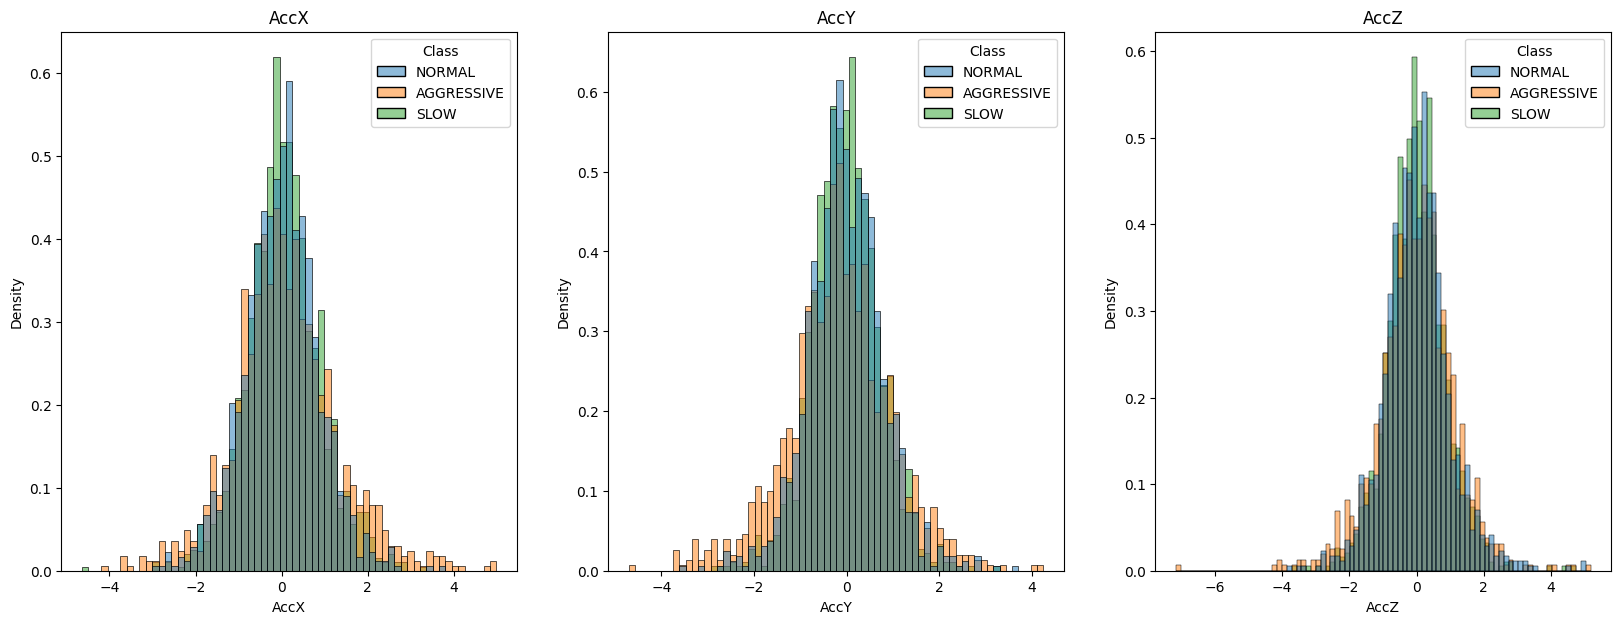

In [16]:
# acceleration histograms
fig, axes = plt.subplots(1, 3, figsize=(20, 7))
axes = axes.flatten()
for i, acc in enumerate(['AccX', 'AccY', 'AccZ']):
    sns.histplot(data=df_complete, x=acc, hue='Class', stat='density', common_norm=False, ax=axes[i])
    axes[i].set_title(acc)

plt.show()

On the X and Y axes we can see that the drivers with AGGRESIVE behavior clearly differentiate from the ones with NORMAL or SLOW behavior, their instances with higher amounts of accelerations during the drive is higher. On the contrary, in the Z axes we have significant overlaps betwwn the trhee behaviors.

However, it is difficult to stablish a clear difference between NORMAL and SLOW behavior on acceleration alone.

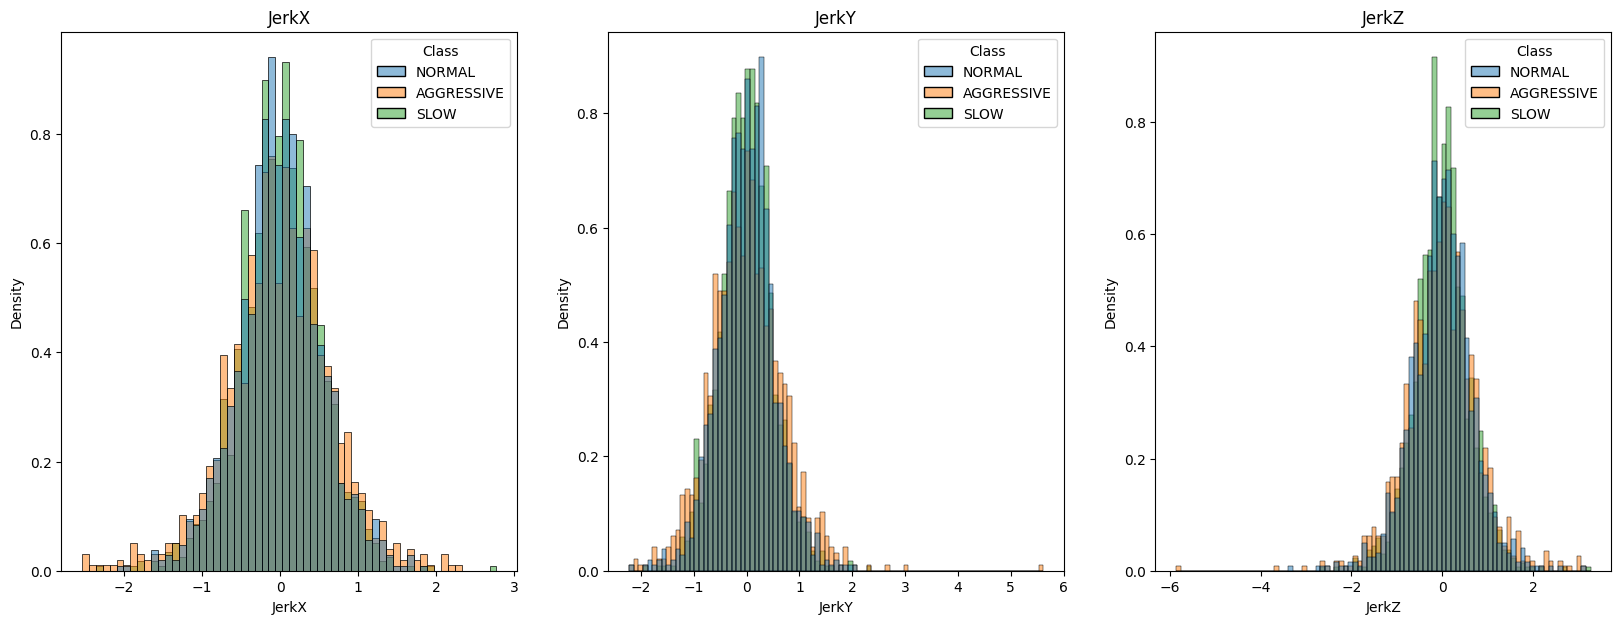

In [17]:
# jerk histograms
fig, axes = plt.subplots(1, 3, figsize=(20, 7))
axes = axes.flatten()
for i, jerk in enumerate(['JerkX', 'JerkY', 'JerkZ']):
    sns.histplot(data=df_complete, x=jerk, hue='Class', stat='density', common_norm=False, ax=axes[i])
    axes[i].set_title(jerk)

plt.show()

The case with the jerk is similar to the one with the acceleration. It is possible to distinguish the AGGRESIVE behavior from the rest on the X and Y axis.

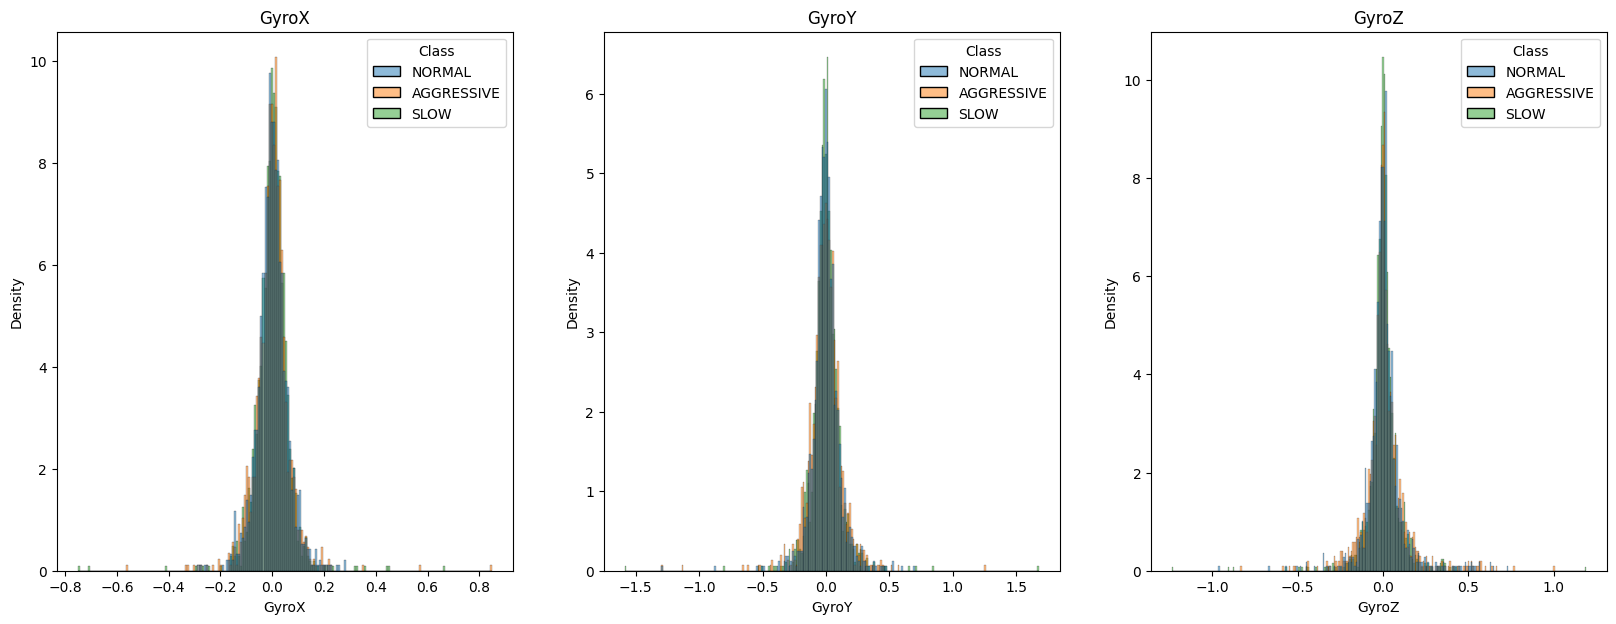

In [20]:
# angular velocity histograms
fig, axes = plt.subplots(1, 3, figsize=(20, 7))
axes = axes.flatten()
for i, gyro in enumerate(['GyroX', 'GyroY', 'GyroZ']):
    sns.histplot(data=df_complete, x=gyro, hue='Class', stat='density', common_norm=False, ax=axes[i])
    axes[i].set_title(gyro)

Analyzing the histograms for the gyroscope's data does not give much insight.

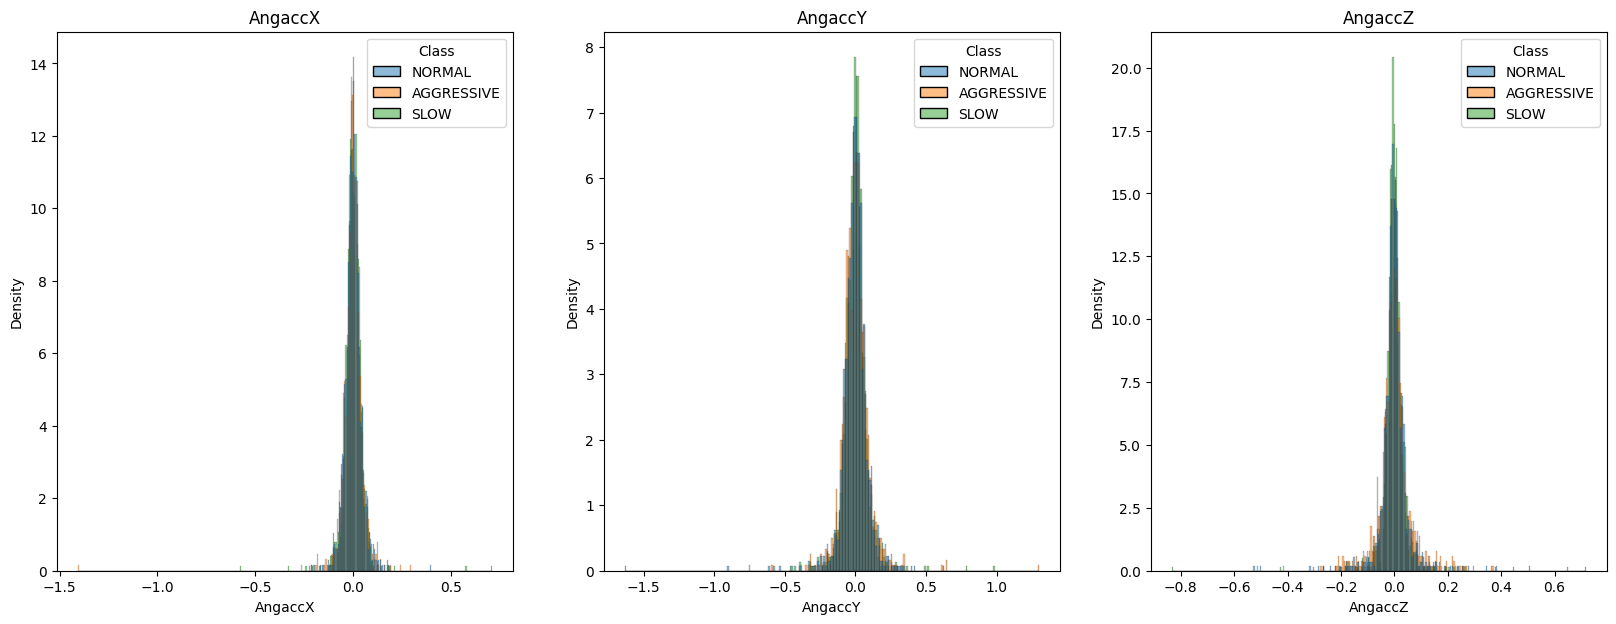

In [24]:
# angular velocity histograms
fig, axes = plt.subplots(1, 3, figsize=(20, 7))
axes = axes.flatten()
for i, a_acc in enumerate(['AngaccX', 'AngaccY', 'AngaccZ']):
    sns.histplot(data=df_complete, x=a_acc, hue='Class', stat='density', common_norm=False, ax=axes[i])
    axes[i].set_title(a_acc)

Analyzing the histograms for the angular acceleration in each axis data does not give much insight either.(except for some tiny distinctions on the Z axis)

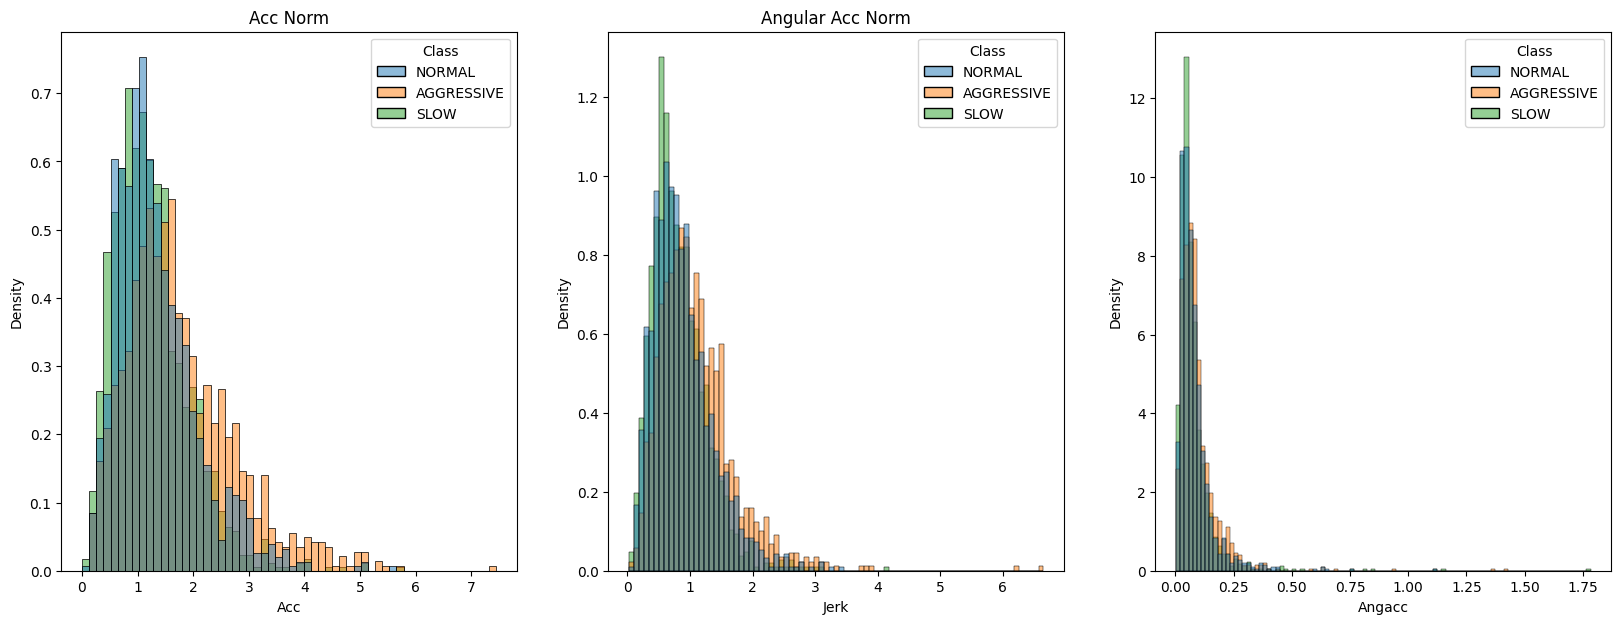

In [31]:
#acc norm and jerk norm
fig, axes = plt.subplots(1, 3, figsize=(20, 7))
axes = axes.flatten()

sns.histplot(data=df_complete, x='Acc', hue='Class', stat='density', common_norm=False, ax=axes[0])
sns.histplot(data=df_complete, x='Jerk', hue='Class', stat='density', common_norm=False, ax=axes[1])
sns.histplot(data=df_complete, x='Angacc', hue='Class', stat='density', common_norm=False, ax=axes[2], bins=100)
axes[0].set_title('Acc Norm')
axes[1].set_title('Jerk Norm')
axes[1].set_title('Angular Acc Norm')

plt.show()